# Drought Severity Index

Generating the drought severity index for `2016_08` in Angola.

In [99]:
import rasterio as rio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cm
import cartopy.crs as ccrs
from shapely import wkt
from rasterstats import zonal_stats

# Single Case: August 2016

In [2]:
raster_path = "../data/processed/monthly_drought_labels/2016_08.tif"
shp_path_prov = "../data/external/Angola_provinces"
shp_path_mun = "../data/external/Angola_municipal"

In [3]:
with rio.open(raster_path) as src:
    bounds = src.bounds
    nodata_val = src.nodatavals
    crs = src.crs
    drought_labels = src.read(1)
shp_prov = gpd.read_file(shp_path_prov)
shp_mun = gpd.read_file(shp_path_mun)
shp_prov = shp_prov.to_crs(crs)
shp_mun = shp_mun.to_crs(crs)

Visualize the pixelated drought label data, emphasizing the province **Kuando Kubango** which seems to be the province that is most affected.

In [4]:
# Let's create a colormap with 5 colors, to match the drought levels (USDM)
custom_colors = [
    "white",
    "yellow",
    "#FFDAB9",
    "orange",
    "red",
    "darkred",
]
cmap = colors.ListedColormap(custom_colors)


In [113]:
def viz_tiff_monthly(date):
    tif_sample = f"../data/processed/monthly_drought_labels/{date}.tif"
    with rio.open(tif_sample) as src:
        label = src.read(1)
        bounds = src.bounds
        crs = src.crs
    fig = plt.figure(figsize=(10, 10))
    img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree()) 

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                    alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                    xlabel_style={'size': 14}) #TODO: insert line styles later

    gl.xlabels_bottom = False
    gl.ylabels_right = False

    plot = ax.imshow(label, cmap=cmap, extent=img_extent)
    shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth = 1.25)
    shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth = 0.5)
    # shp_prov[shp_prov.NAME == 'Kuando Kubango'].geometry.boundary.plot(ax=ax, color='blue', linewidth = 2)

    # Set fixed boundaries and normalization for consistent color mapping
    boundaries = np.arange(0, 7)
    norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

    cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
    # cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('USDM Drought Categories', fontsize=18)
    cbar.set_ticks(np.linspace(0.5,5.5,6)) #TODO: tick location might vary because not all classes might be present in the data
    cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])

    fig.suptitle(f'{date}', fontsize=20)

    plt.savefig(f'../results/figures/monthly drought labels/{date}.png', dpi=300, bbox_inches='tight')
    plt.close()

In [115]:
date_range = pd.date_range('06/2015', '12/2023', freq='M').strftime('%Y_%m')
date_range

C:\Users\esl26\AppData\Local\Temp\ipykernel_39668\2027031594.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range('06/2015', '12/2023', freq='M').strftime('%Y_%m')


Index(['2015_06', '2015_07', '2015_08', '2015_09', '2015_10', '2015_11',
       '2015_12', '2016_01', '2016_02', '2016_03',
       ...
       '2023_02', '2023_03', '2023_04', '2023_05', '2023_06', '2023_07',
       '2023_08', '2023_09', '2023_10', '2023_11'],
      dtype='object', length=102)

In [116]:
for date in date_range:
    viz_tiff_monthly(date)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is

Create a video out of all these images

Change the NAN values to -1

In [5]:
drought_labels = np.nan_to_num(drought_labels, nan=-1)
drought_labels, np.unique(drought_labels)

(array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]),
 array([-1.,  0.,  1.,  2.,  3.,  4.]))

In [6]:
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030..."
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608..."
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789..."
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7..."
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632..."
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538..."
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795..."
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216..."


In [7]:
stats = zonal_stats(shp_mun, drought_labels, affine=src.transform, categorical=True)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [8]:
stats

[{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1},
 {-1.0: 4, 0.0: 13, 1.0: 22},
 {-1.0: 14},
 {-1.0: 48},
 {-1.0: 61, 0.0: 1},
 {-1.0: 112, 0.0: 15},
 {-1.0: 82, 0.0: 1, 3.0: 2},
 {-1.0: 86},
 {-1.0: 33},
 {-1.0: 16, 0.0: 1},
 {-1.0: 14},
 {-1.0: 15},
 {-1.0: 67},
 {-1.0: 21, 0.0: 3, 1.0: 3, 2.0: 3},
 {-1.0: 106},
 {-1.0: 73},
 {-1.0: 11},
 {-1.0: 21, 0.0: 4},
 {-1.0: 26, 0.0: 8},
 {-1.0: 14},
 {-1.0: 106, 0.0: 31, 1.0: 102, 2.0: 99, 3.0: 116, 4.0: 54},
 {-1.0: 26, 0.0: 1},
 {-1.0: 52},
 {-1.0: 17, 0.0: 5, 1.0: 7, 2.0: 1},
 {-1.0: 5, 0.0: 22, 1.0: 153, 2.0: 7},
 {-1.0: 55, 0.0: 3},
 {-1.0: 16, 0.0: 3},
 {-1.0: 5},
 {-1.0: 29, 0.0: 12, 1.0: 4, 2.0: 1},
 {-1.0: 56, 0.0: 4, 1.0: 7, 2.0: 13, 3.0: 1},
 {-1.0: 112, 1.0: 1, 2.0: 6, 3.0: 10},
 {-1.0: 18, 0.0: 34, 1.0: 17},
 {-1.0: 27, 0.0: 5, 1.0: 8, 2.0: 1, 3.0: 3, 4.0: 1},
 {-1.0: 36, 0.0: 13, 1.0: 50, 2.0: 2},
 {-1.0: 43, 0.0: 20, 1.0: 31},
 {-1.0: 9, 0.0: 22, 1.0: 4},
 {-1.0: 116},
 {-1.0: 31},
 {-1.0: 62, 1.0: 2, 2.0: 1, 3.0: 1},
 {-1.0: 117, 0.0:

In [9]:
shp_mun['ADM2_EN'][20], shp_mun['ADM1_EN'][20], stats[20]

('Bundas (Lumbala-Nguimbo)',
 'Moxico',
 {-1.0: 106, 0.0: 31, 1.0: 102, 2.0: 99, 3.0: 116, 4.0: 54})

Plot the class in a province using a bar graph

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (2,).

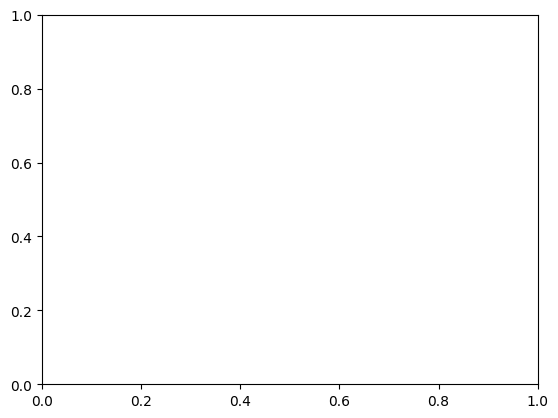

In [12]:
fig, ax = plt.subplots()

# Define the positions of the bars on the x-axis
x_pos = np.arange(6)

# Create the bars
ax.bar(x_pos, stats[4].values(), align='center', alpha=0.7, color=["gray", "yellow", "#FFDAB9", "orange","red", "darkred"])

# Add labels to the x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(['No Drought','D0', 'D1', 'D2', 'D3', 'D4'])

# Add a title and labels to the axes
ax.set_title('Kuando Kubango (2016_08)')
ax.set_xlabel('USDM Drought Categories')
ax.set_ylabel('Number of Pixels')

# Save the figure
plt.savefig("../results/figures/hist_kuando_kubango_2016_08.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Plot the classes in a municipality using a bar graph

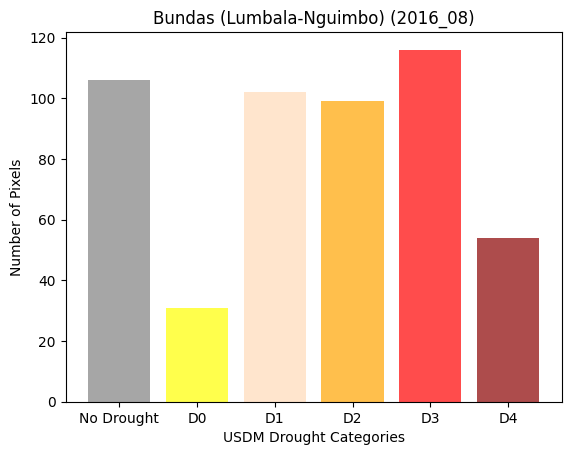

In [10]:
fig, ax = plt.subplots()

# Define the positions of the bars on the x-axis
x_pos = np.arange(6)

# Create the bars
ax.bar(x_pos, stats[20].values(), align='center', alpha=0.7, color=["gray", "yellow", "#FFDAB9", "orange","red", "darkred"])

# Add labels to the x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(['No Drought','D0', 'D1', 'D2', 'D3', 'D4'])

# Add a title and labels to the axes
ax.set_title('Bundas (Lumbala-Nguimbo) (2016_08)')
ax.set_xlabel('USDM Drought Categories')
ax.set_ylabel('Number of Pixels')

# Save the figure
plt.savefig("../results/figures/hist_Bundas_(Lumbala-Nguimbo)_2016_08.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Add the distribution of data as a column to the geodataframe.

In [11]:
shp_mun['Drought Distribution'] = stats
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}"
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}"
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14}
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48}
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16}
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19}
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9}
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195}


In [12]:
def compute_ds_index(drought_dist):
    total_pixels = sum(drought_dist.values())
    ds_index = 0
    for i, (_, v) in enumerate(drought_dist.items()):
        ds_index += i*(v/total_pixels)
    return ds_index

In [13]:
shp_mun['Drought Severity Index'] = [compute_ds_index(shp_mun['Drought Distribution'][i]) for i in range(len(shp_mun))]
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000


In [14]:
compute_ds_index(shp_mun['Drought Distribution'][5])

0.11811023622047244

In [15]:
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [16]:
shp_mun['Norm Drought Severity Index'] = normalize(shp_mun['Drought Severity Index'], 0, 1)
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395,0.188415
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538,0.531209
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000,0.000000
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000,0.000000
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129,0.005862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000,0.000000
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000,0.000000
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000,0.000000
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000,0.000000


c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


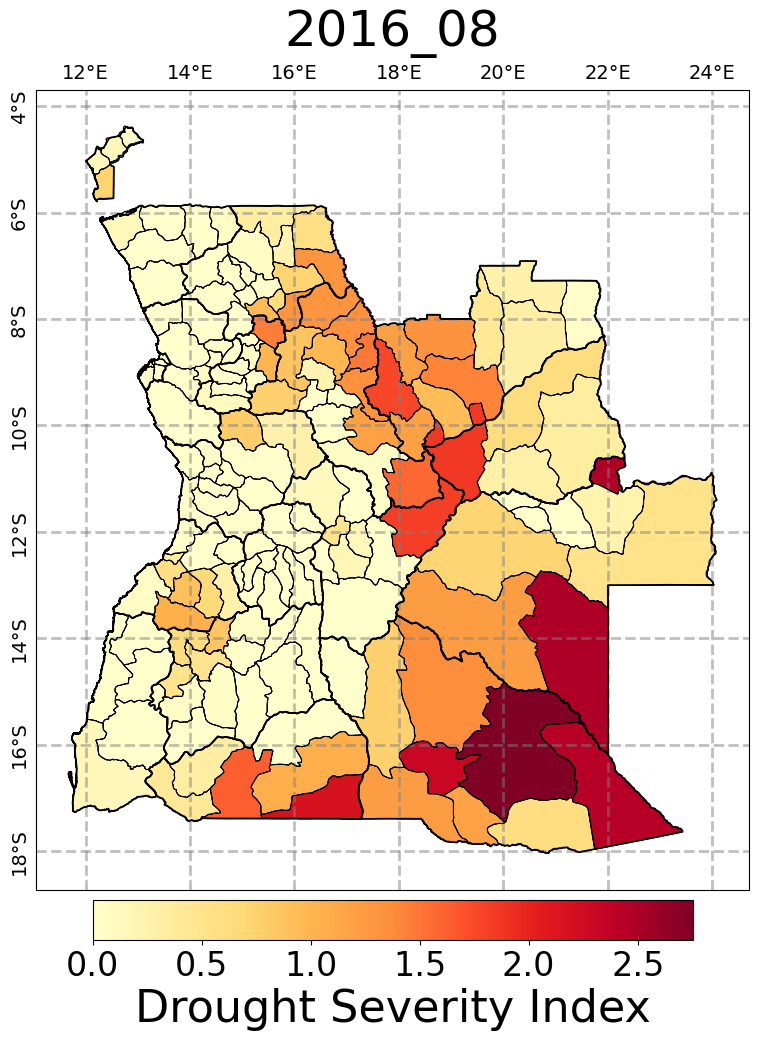

In [21]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Drought Severity Index', cmap='YlOrRd', linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Drought Severity Index', fontsize=32)

fig.suptitle('2016_08', fontsize=36)

plt.savefig(f'../results/figures/mun_raw_ds_index_2016_08.png', dpi=300, bbox_inches='tight')

Check the distribution of the drought severity index.

(array([120.,  27.,   8.,   6.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

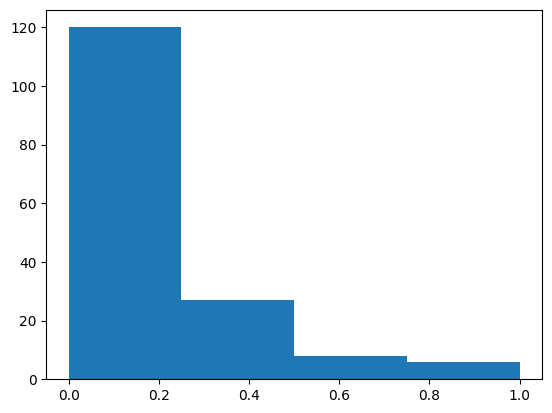

In [21]:
plt.hist(shp_mun['Norm Drought Severity Index'], bins=4)

Define the boundaries with equal intervals (0-0.25, 0.25-0.5, 0.5-0.75, 0.75-1) using `pd.cut()` function

In [22]:
shp_mun['Drought Severity Classes'] = pd.cut(shp_mun['Norm Drought Severity Index'], bins=4, labels=[0,1,2,3])
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395,0.188415,0
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538,0.531209,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000,0.000000,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129,0.005862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000,0.000000,0
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000,0.000000,0
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000,0.000000,0
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000,0.000000,0


Since the distribution is uneven, should we use the `.qcut` function?

In [ ]:
# Insert code

We could also use **Fisher-Jenks Algorithm** which was used in our reference papers. Here, we use the `jenkspy` [package](https://github.com/mthh/jenkspy) maintained by Matthieu Wiry.

In [23]:
import jenkspy

breaks = jenkspy.jenks_breaks(shp_mun['Norm Drought Severity Index'], n_classes=4)
breaks

[0.0, 0.13629713914174252, 0.38411011939945616, 0.6783272949799378, 1.0]

In [24]:
shp_mun['Drought Severity Classes'] = pd.cut(shp_mun['Norm Drought Severity Index'],
                        bins=breaks,
                        labels=[0, 1, 2, 3],
                        include_lowest=True)
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395,0.188415,1
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538,0.531209,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000,0.000000,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129,0.005862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000,0.000000,0
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000,0.000000,0
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000,0.000000,0
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000,0.000000,0


In [26]:
four_colors = [
    "yellow",
    "orange",
    "red",
    "darkred",
]
cmap2 = colors.ListedColormap(four_colors)

(array([107.,   0.,   0.,  28.,   0.,   0.,  20.,   0.,   0.,   6.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

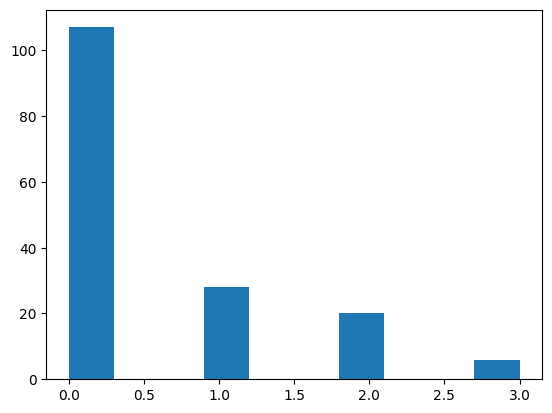

In [29]:
plt.hist(shp_mun['Drought Severity Classes'])

**Provincial**

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_16668\2179239869.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


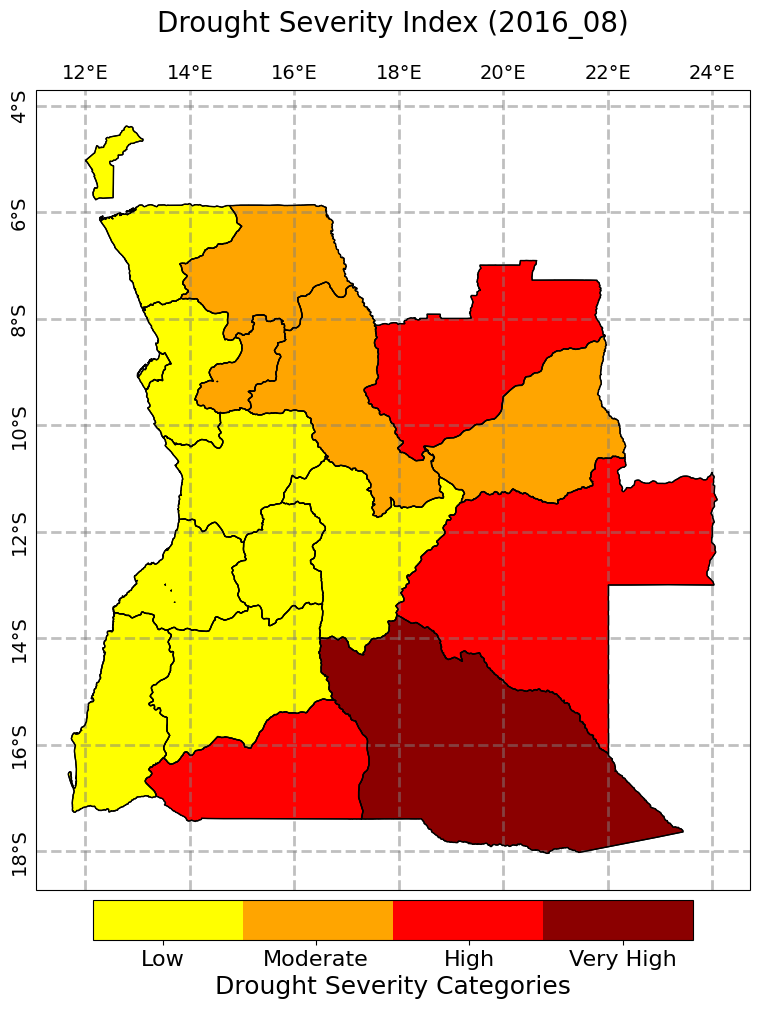

In [25]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = boundaries.plot(ax=ax, column='Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
boundaries.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Drought Severity Categories', fontsize=18)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Drought Severity Index (2016_08)', fontsize=20)

plt.savefig(f'../results/figures/ds_index_2016_08.png', dpi=300, bbox_inches='tight')

**Municipality**

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_39668\924692548.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


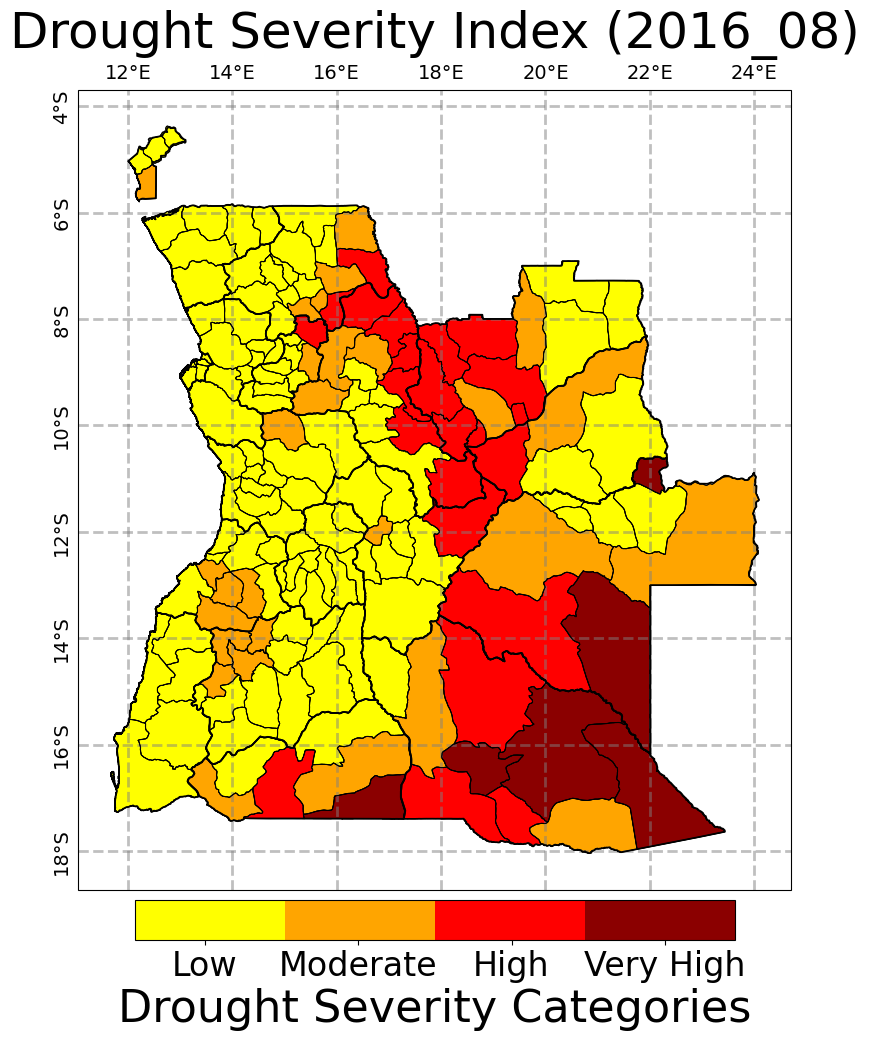

In [28]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Drought Severity Categories', fontsize=32)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Drought Severity Index (2016_08)', fontsize=36)

plt.savefig(f'../results/figures/mun_ds_index_2016_08.png', dpi=300, bbox_inches='tight')

Check the distribution of the drought severity index and the USDM drought category data.

In [33]:
gpd.GeoDataFrame.to_csv(shp_mun, '../results/mun_ds_index_2016_08.csv', index=False)

Let's try testing if the csv file is a compatible file type for visualizing data.

In [34]:
crs

CRS.from_epsg(4326)

In [35]:
df = pd.read_csv('../results/mun_ds_index_2016_08.csv')

df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395,0.188415,0
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538,0.531209,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,NaN,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000,0.000000,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129,0.005862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000,0.000000,0
157,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000,0.000000,0
158,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000,0.000000,0
159,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000,0.000000,0


<Axes: >

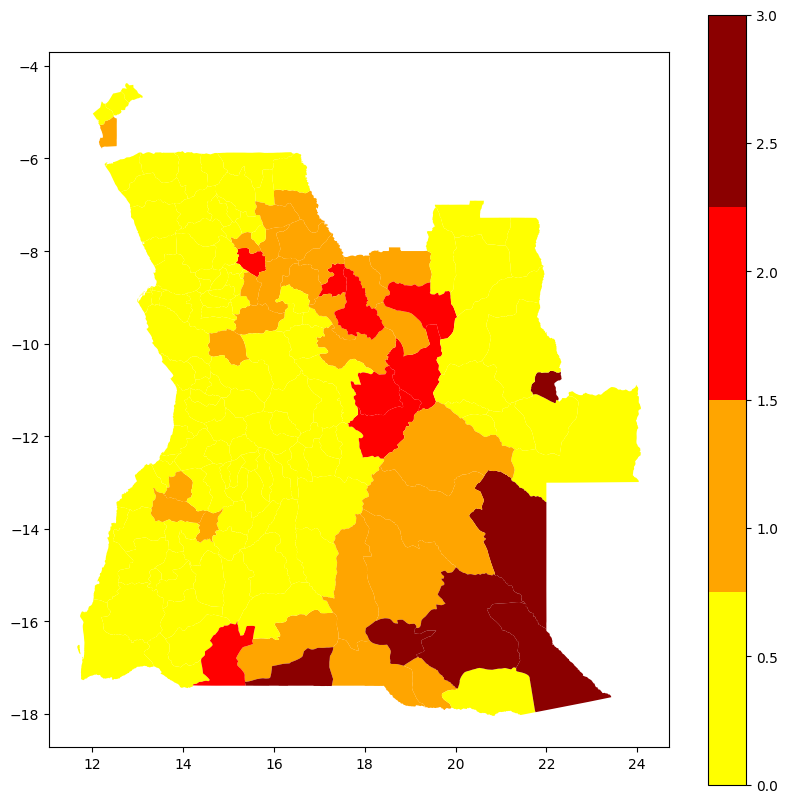

In [36]:
gdf.plot(column='Drought Severity Classes', legend=True, cmap=cmap2, figsize=(10, 10))

## Multiple Case
- Store all DS indices in a SHP file

In [29]:
import os
import time

In [30]:
def generate_ds_index(startDate, endDate, shp_path, tif_path, output_path):

    start_time = time.time()

    date_range = pd.date_range(startDate, endDate, freq='M').strftime('%Y_%m')
    boundaries = gpd.read_file(shp_path)
    boundaries = boundaries.to_crs('EPSG:4326')
    repeated_rows = [boundaries.iloc[:161]]
    output_df = pd.DataFrame()

    for date in date_range:
        print(f"Generating drought severity index in {date}...")
        tif_sample = os.path.join(tif_path, f"{date}.tif")
        with rio.open(tif_sample) as src:
            drought_labels = src.read(1)

        new_df = pd.concat(repeated_rows, ignore_index=False)

        drought_labels = np.nan_to_num(drought_labels, nan=-1)
        stats = zonal_stats(boundaries, drought_labels, affine=src.transform, categorical=True)
        new_df['Month'] = date.split('_')[1]
        new_df['Year'] = date.split('_')[0]
        new_df['Drought Distribution'] = stats
        new_df['Drought Severity Index'] = [compute_ds_index(new_df['Drought Distribution'][i]) for i in range(len(new_df))]
        new_df['Norm Drought Severity Index'] = normalize(new_df['Drought Severity Index'], 0, 1)
        breaks = jenkspy.jenks_breaks(new_df['Norm Drought Severity Index'], n_classes=4)
        new_df['Drought Severity Classes'] = pd.cut(new_df['Norm Drought Severity Index'], bins=breaks, labels=[0,1,2,3], include_lowest=True)
        output_df = pd.concat([output_df, new_df], ignore_index=True)
    
    output_gdf = gpd.GeoDataFrame(output_df, crs='epsg:4326')
    gpd.GeoDataFrame.to_csv(output_gdf, os.path.join(output_path, f'mun_ds_index_{date_range[0]}-{date_range[-1]}.csv'), index=False)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Script finished running in {elapsed_time:.2f} seconds")
    return output_gdf

In [31]:
shp_path = "../data/external/Angola_municipal"
raster_path = "../data/processed/monthly_drought_labels"
generate_ds_index('06/2015', '08/2015', shp_path, raster_path, '../results/indices')

C:\Users\esl26\AppData\Local\Temp\ipykernel_39668\609000555.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(startDate, endDate, freq='M').strftime('%Y_%m')


Generating drought severity index in 2015_06...
Generating drought severity index in 2015_07...
Script finished running in 2.84 seconds


,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,date,validOn,validTo,geometry,Month,Year,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",06,2015,"{-1.0: 594, 0.0: 4}",0.006689,0.002066,0
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",06,2015,{-1.0: 39},0.000000,0.000000,0
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",06,2015,{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,...,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",06,2015,"{-1.0: 45, 0.0: 2, 1.0: 1}",0.083333,0.025735,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",06,2015,{-1.0: 62},0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",07,2015,{-1.0: 16},0.000000,0.000000,0
318,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",07,2015,"{-1.0: 17, 0.0: 2}",0.105263,0.052012,0
319,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",07,2015,"{-1.0: 7, 0.0: 2}",0.222222,0.109804,0
320,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",07,2015,{-1.0: 195},0.000000,0.000000,0


In [49]:
ds_index_database.head(18)

,NAME,SHPAREASQM,CODE_PROV,geometry,Month,Year,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,Bengo,3.799123e+10,1,MULTIPOLYGON (((13.123213574042353 -7.83117192...,6,2015,"{-1.0: 347, 0.0: 28, 1.0: 48, 2.0: 21, 3.0: 12...",0.730689,0.783589,3
1,Benguela,3.954707e+10,2,MULTIPOLYGON (((12.534784238961766 -13.4916427...,6,2015,"{-1.0: 463, 0.0: 22, 1.0: 13}",0.096386,0.103364,0
2,Bié,7.214479e+10,3,POLYGON ((16.51989767653864 -12.92742367173082...,6,2015,"{-1.0: 815, 0.0: 66, 1.0: 20, 2.0: 1}",0.120843,0.129591,0
3,Cabinda,6.975749e+09,4,POLYGON ((12.710993199599356 -4.46888293636067...,6,2015,"{-1.0: 79, 0.0: 8}",0.091954,0.098611,0
4,Kuando Kubango,1.997968e+11,5,POLYGON ((22.23645770750285 -16.57306174104963...,6,2015,"{-1.0: 2284, 0.0: 214, 1.0: 43}",0.118064,0.126611,0
5,Kwanza Norte,2.029464e+10,6,POLYGON ((14.54236897824651 -9.779219217157618...,6,2015,"{-1.0: 95, 0.0: 70, 1.0: 65, 2.0: 7}",0.932489,1.000000,3
6,Kwanza Sul,5.539526e+10,7,POLYGON ((15.265107022513641 -9.79955862916119...,6,2015,"{-1.0: 638, 0.0: 22, 1.0: 13, 2.0: 16, 3.0: 2}",0.150507,0.161403,0
7,Kunene,7.735317e+10,8,POLYGON ((16.29436583392417 -17.38977939316112...,6,2015,"{-1.0: 502, 0.0: 282, 1.0: 190, 2.0: 11}",0.705584,0.756667,3
8,Huambo,3.318300e+10,9,POLYGON ((16.326048224004246 -11.6063930098840...,6,2015,"{-1.0: 364, 0.0: 34, 1.0: 14}",0.150485,0.161380,0
9,Huíla,7.874020e+10,10,POLYGON ((15.544721335623244 -13.7605203603804...,6,2015,"{-1.0: 496, 0.0: 231, 1.0: 200, 2.0: 69}",0.841365,0.902279,3


(array([63.,  0.,  0., 16.,  0.,  0., 13.,  0.,  0., 10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

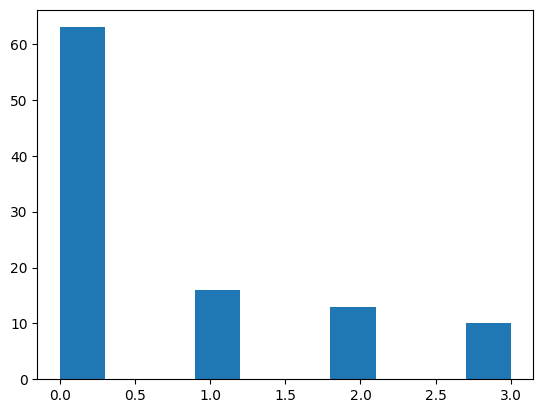

In [47]:
ds_index_database = pd.read_csv('../results/indices/mun_ds_index_2015_06-2023_11.csv')
plt.hist(ds_index_database.loc[ds_index_database['ADM2_EN'] == 'Bundas (Lumbala-Nguimbo)']['Drought Severity Classes'])

## Generate aggregated drought severity index into a single map (June 2015-Nov 2023)

In [48]:
ds_index_database

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,date,validOn,validTo,geometry,Month,Year,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((24.016370773000062 -11.0182943339999...,6,2015,"{-1.0: 594, 0.0: 4}",0.006689,0.002066,0
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((15.491155624000044 -8.05464076999993...,6,2015,{-1.0: 39},0.000000,0.000000,0
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((14.565995216000033 -10.7665882109999...,6,2015,{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,...,2018-08-30,2018-09-04,NaN,MULTIPOLYGON (((13.127082825000059 -7.83735990...,6,2015,"{-1.0: 45, 0.0: 2, 1.0: 1}",0.083333,0.025735,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,NaN,NaN,Uíge,AO17,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((14.62843704200003 -7.351354121999975...,6,2015,{-1.0: 62},0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16417,1.476876,0.109907,Uíge,AO17157,Uige,NaN,NaN,Uíge,AO17,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((15.295760155000039 -7.62522697399992...,11,2023,{-1.0: 16},0.000000,0.000000,0
16418,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((15.34875869800004 -12.51496696499992...,11,2023,{-1.0: 19},0.000000,0.000000,0
16419,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((13.53439140300003 -8.889158248999934...,11,2023,{-1.0: 9},0.000000,0.000000,0
16420,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,...,2018-08-30,2018-09-04,NaN,POLYGON ((12.709320068000068 -15.2035579679999...,11,2023,{-1.0: 195},0.000000,0.000000,0


Plan to aggregate index
- Collect the normalized severity index of each province and compute the sum (Dabanli)
    - Loop through every province
    - Instead of initializing a dictionary for the data, we instead use the function `pd.DateRange()` function
- Store in a new geodataframe
    - Start with the shapefile and just store the final drought severity index
- Save as a CSV file
- Visualize and save figure

Questions [#TODO]

Do we add the normalized drought severity index or the non-normalized drought severity index? My hunch is the former.

In [49]:
ds_index_database[ds_index_database['ADM2_EN'] == 'Viana']['Drought Severity Index'].describe()

count    102.000000
mean       0.277778
std        0.405243
min        0.000000
25%        0.000000
50%        0.000000
75%        0.527778
max        1.444444
Name: Drought Severity Index, dtype: float64

In [50]:
final_ds_index = []
for i in range(161): # there are 161 municipalities in Angola
    mun_name = ds_index_database['ADM2_EN'][i]
    final_ds_index.append(ds_index_database[ds_index_database['ADM2_EN'] == mun_name]['Drought Severity Index'].sum())
final_ds_index

[48.97993311036789,
 26.794871794871796,
 25.07142857142857,
 42.0625,
 32.58064516129032,
 30.377952755905508,
 27.588235294117645,
 20.790697674418606,
 17.090909090909093,
 18.0,
 35.64285714285714,
 35.2,
 31.507462686567166,
 41.03333333333334,
 31.943396226415096,
 23.397260273972602,
 16.727272727272727,
 39.4,
 29.352941176470583,
 23.07142857142857,
 48.53740157480315,
 24.18518518518518,
 15.75,
 36.800000000000004,
 47.62566844919787,
 17.56896551724138,
 30.89473684210526,
 26.2,
 30.717391304347828,
 35.23456790123457,
 34.35658914728682,
 28.26086956521739,
 31.244444444444447,
 49.78217821782179,
 34.03191489361702,
 16.628571428571426,
 38.293103448275865,
 33.64516129032258,
 44.030303030303024,
 32.795081967213115,
 45.84472049689441,
 21.76530612244898,
 29.148936170212767,
 35.693333333333335,
 32.78378378378379,
 39.95959595959596,
 19.129032258064512,
 28.77142857142857,
 25.02631578947368,
 28.5,
 32.5735294117647,
 0.0,
 34.00000000000001,
 19.524590163934427,
 

Re-initialize shapefile

In [51]:
shp_path_mun = "../data/external/Angola_municipal"
shp_mun = gpd.read_file(shp_path_mun)
shp_mun = shp_mun.to_crs('EPSG:4326')
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030..."
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608..."
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789..."
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7..."
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632..."
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538..."
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795..."
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216..."


Add the final drought severity index per municipality.

In [52]:
shp_mun['Final Drought Severity Index'] = final_ds_index

In [53]:
shp_mun['Final Norm Drought Severity Index'] = normalize(shp_mun['Final Drought Severity Index'], 0, 1)
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Final Drought Severity Index,Final Norm Drought Severity Index
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,0.808023
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,0.442035
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,0.413604
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,0.693906
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,0.537483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0.388711
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0.212725
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,0.467415
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0.388653


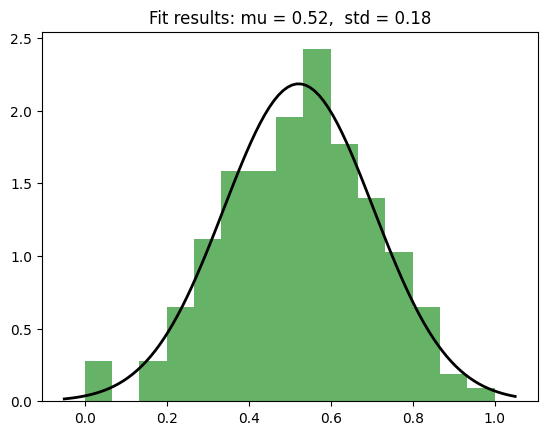

In [54]:
import scipy.stats as stats

# Plot the histogram of the data
data = shp_mun['Final Norm Drought Severity Index']
plt.hist(data, bins=15, density=True, alpha=0.6, color='g')

# Fit a normal distribution to the data
mu, std = stats.norm.fit(data)

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Should I subject this to a K-S test to see if it is normally distributed? It seems like it, so we can just follow the normal break method.

<Axes: >

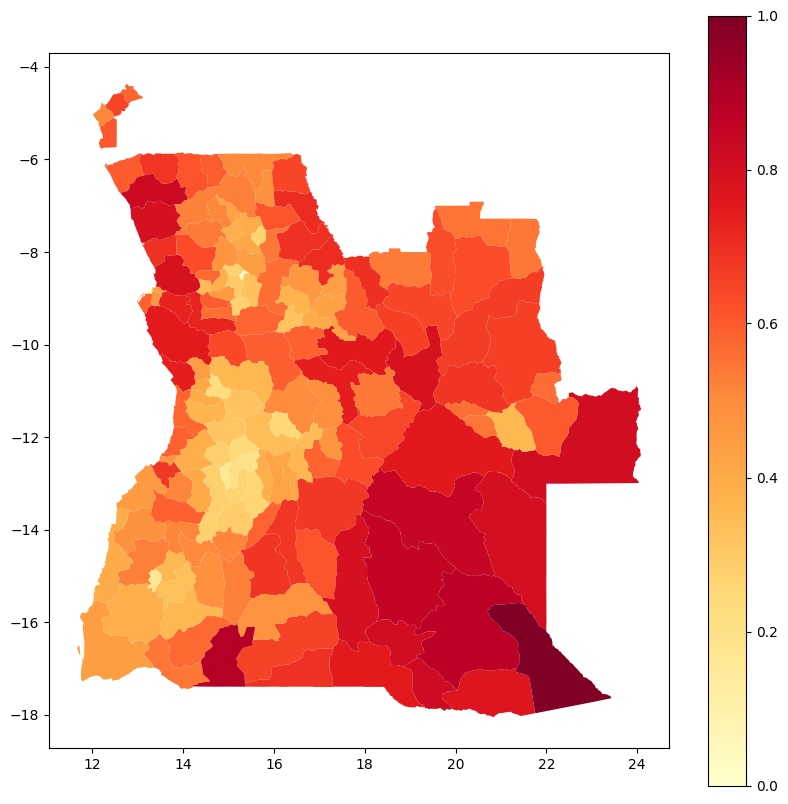

In [55]:
shp_mun.plot(column='Final Norm Drought Severity Index', legend=True, cmap='YlOrRd', figsize=(10, 10))

Using just the normal cut function.

In [56]:
shp_mun['Final Drought Severity Classes'] = pd.cut(shp_mun['Final Norm Drought Severity Index'],
                        bins=4,
                        labels=[0, 1, 2, 3])
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Final Drought Severity Index,Final Norm Drought Severity Index,Final Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,0.808023,3
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,0.442035,1
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,0.413604,1
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,0.693906,2
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,0.537483,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0.388711,1
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0.212725,0
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,0.467415,1
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0.388653,1


Use the Fisher-Jenks Algorithm to cut the data into four clusters.

In [64]:
breaks

[0.0, 18.0, 29.434343434343432, 40.479452054794514, 60.61702127659574]

In [63]:
import jenkspy

breaks = jenkspy.jenks_breaks(shp_mun['Final Drought Severity Index'], n_classes=4)

shp_mun['Final Drought Severity Classes'] = pd.cut(shp_mun['Final Drought Severity Index'],
                        bins=breaks,
                        labels=[0, 1, 2, 3],
                        include_lowest=True)
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Final Drought Severity Index,Final Norm Drought Severity Index,Final Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,0.808023,3
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,0.442035,1
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,0.413604,1
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,0.693906,3
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,0.537483,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0.388711,1
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0.212725,0
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,0.467415,1
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0.388653,1


In [102]:
shp_mun['Final Drought Severity Classes'] = pd.qcut(shp_mun['Final Norm Drought Severity Index'],
                        q=4,
                        labels=[0, 1, 2, 3])
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Final Drought Severity Index,Final Drought Severity Classes,Final Norm Drought Severity Index
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,3,0.808023
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,1,0.442035
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,1,0.413604
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,3,0.693906
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,2,0.537483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0,0.388711
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0,0.212725
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,1,0.467415
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0,0.388653


Text(0.5, 1.0, 'Quantile Cut Method')

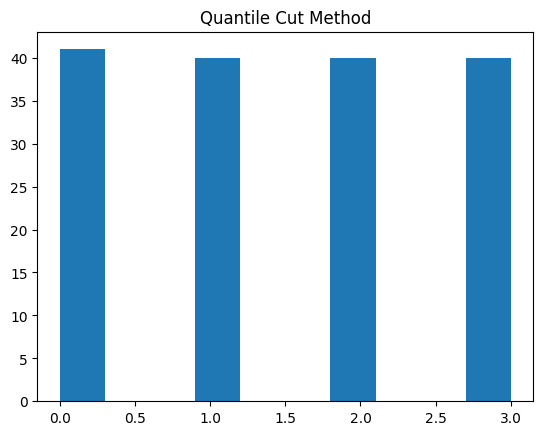

In [103]:
plt.hist(shp_mun['Final Drought Severity Classes'])
plt.title('Quantile Cut Method')

Text(0.5, 1.0, 'Normal Break Method')

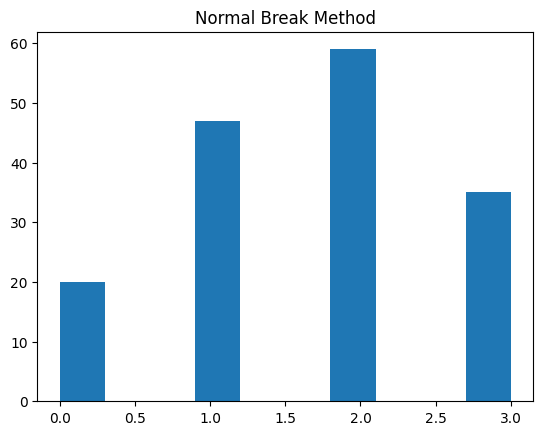

In [43]:
plt.hist(shp_mun['Final Drought Severity Classes'])
plt.title('Normal Break Method')

Text(0.5, 1.0, 'Jenks Natural Break Method')

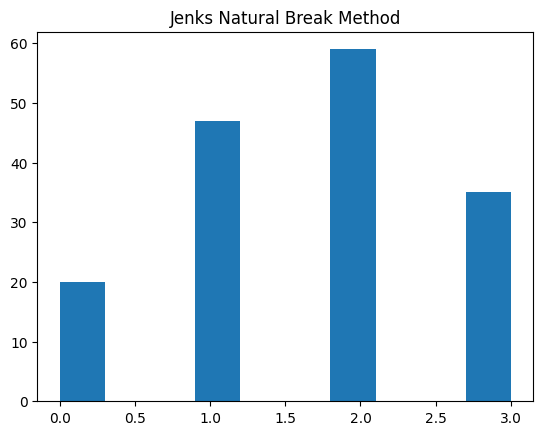

In [65]:
plt.hist(shp_mun['Final Drought Severity Classes'])
plt.title('Jenks Natural Break Method')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_44016\185750220.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


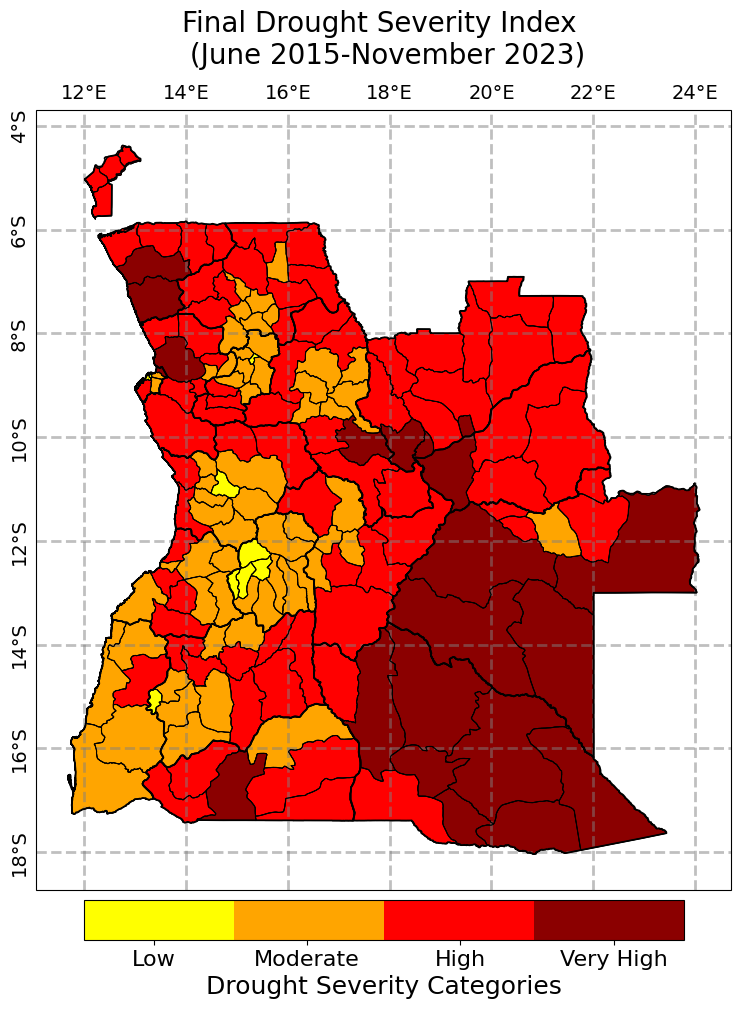

In [101]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.78], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Final Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Drought Severity Categories', fontsize=18)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Final Drought Severity Index \n (June 2015-November 2023)', fontsize=20)

plt.savefig(f'../results/figures/mun_final_ds_index_normal_break.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_39668\3158420120.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


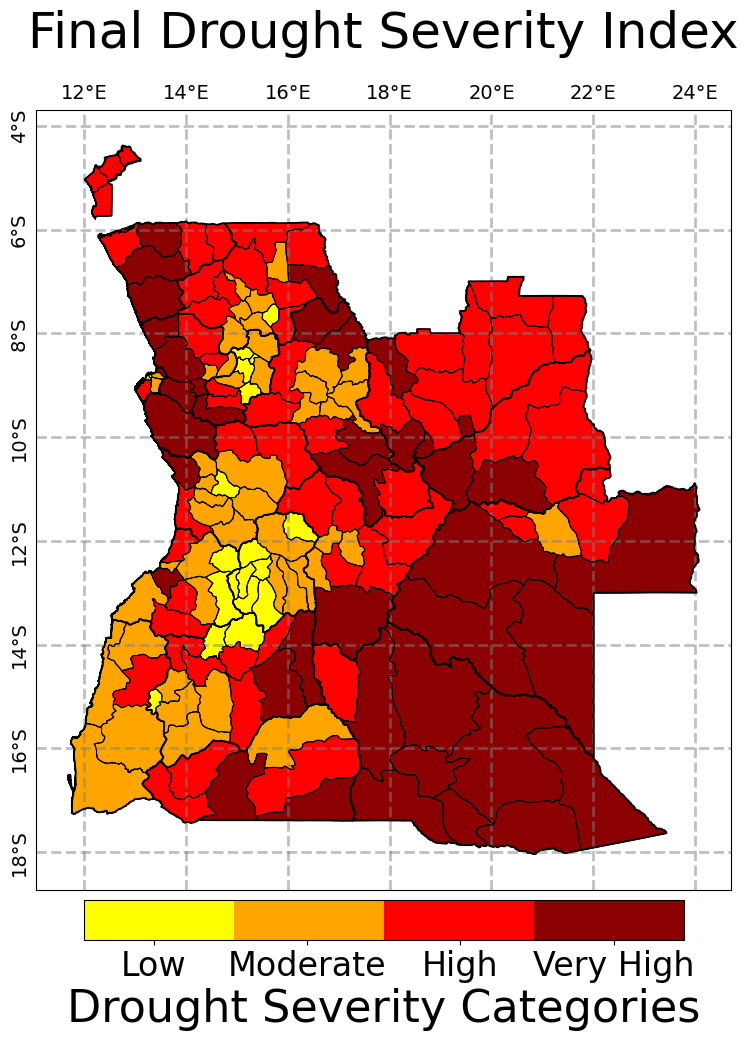

In [46]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.78], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Final Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Drought Severity Categories', fontsize=32)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Final Drought Severity Index', fontsize=36)

plt.savefig(f'../results/figures/mun_final_ds_index_natural_break.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_44016\4156420423.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


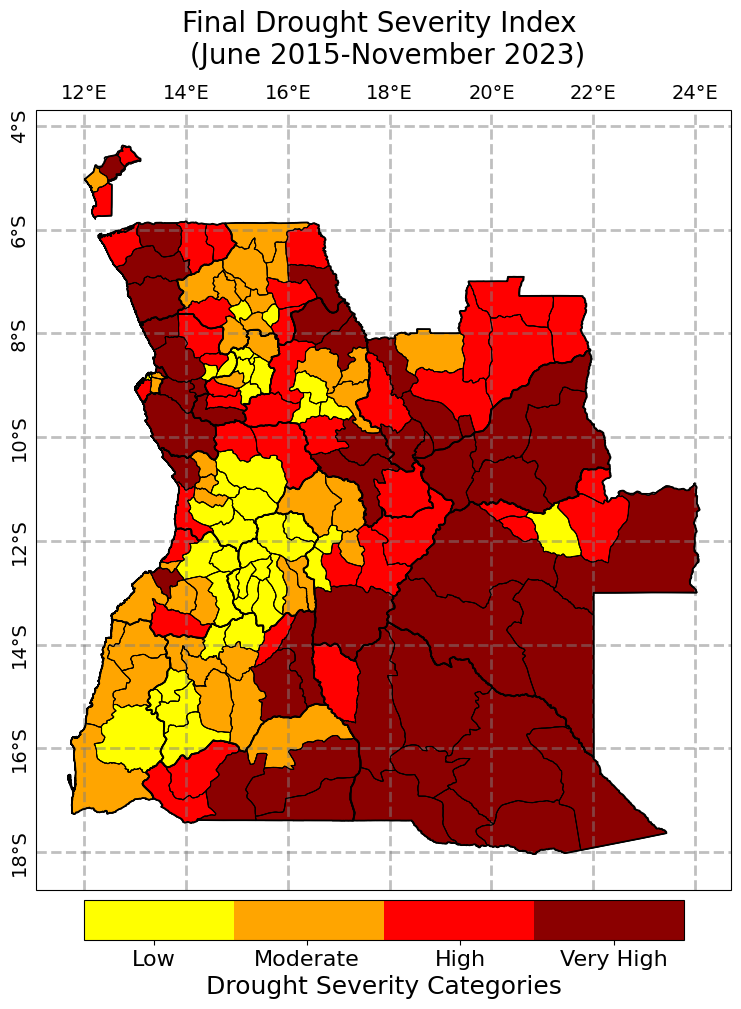

In [104]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.78], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Final Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Drought Severity Categories', fontsize=18)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Final Drought Severity Index \n (June 2015-November 2023)', fontsize=20)

plt.savefig(f'../results/figures/mun_final_ds_index_quantile_cut.png', dpi=300, bbox_inches='tight')

Save to csv file!

In [60]:
shp_mun.to_csv('../results/indices/mun_ds_index.csv', index=False)